<a href="https://colab.research.google.com/github/steenbergen/DeepLearn/blob/main/feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

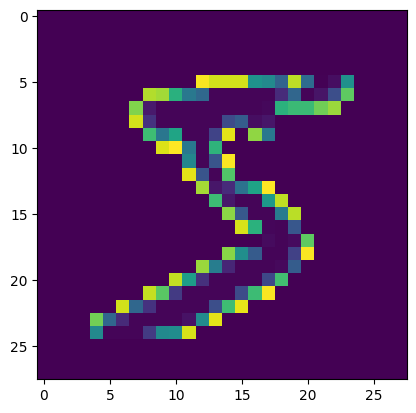

In [2]:
import numpy as np
import PIL.Image as pil
from matplotlib import pyplot as plt
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt


img1 = train_images[0]
gen_image(img1)

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**uint8** is an 8-bit unsigned integer from 0 through 255.

# Model

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [9]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [10]:
# Getting data normalized and in a format that Keras likes
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
# I ammended this code to have a 20% validation set.
# This can help us assess whether we are over-training.
fitted = model.fit(train_images, train_labels,
          epochs = 20, batch_size = 128, validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 7s 5ms/step - loss: 0.2930 - accuracy: 0.9164 - val_loss: 0.1540 - val_accuracy: 0.9571
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1229 - accuracy: 0.9638 - val_loss: 0.1113 - val_accuracy: 0.9672
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9769 - val_loss: 0.0945 - val_accuracy: 0.9702
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9827 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9873 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9906 - val_loss: 0.0755 - val_accuracy: 0.9766
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0715 - val_accuracy: 0.9781
Epoch 

In [12]:
print(fitted.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


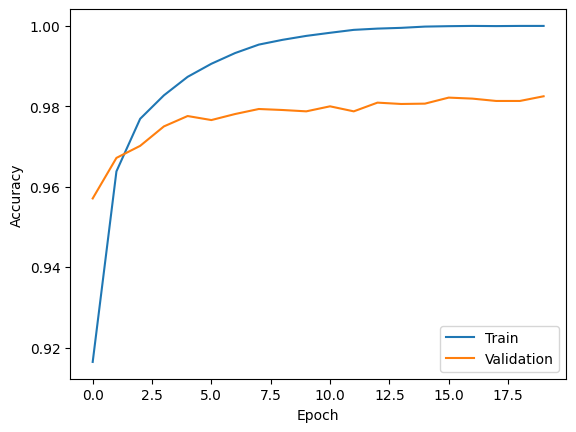

In [15]:
import matplotlib.pyplot as plt
plt.plot(fitted.history["accuracy"])
plt.plot(fitted.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "lower right")
plt.show()

In [16]:
fitted.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [17]:
test_digits = test_images[0:1]
predictions = fitted.model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 86ms/step


array([3.5455406e-12, 2.4075165e-13, 7.5375084e-10, 6.6520664e-07,
       1.0996325e-18, 3.4536420e-14, 6.1491614e-19, 9.9999928e-01,
       1.3207591e-12, 5.0745195e-09], dtype=float32)

In [18]:
predictions[0].argmax()

7

In [19]:
test_loss, test_acc = fitted.model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9830
Test Accuracy: 0.9829999804496765
